# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Envelope Detector
***

Referring to Figure 5.10, the current for a simple diode detector may be written as (Equation 5.11)

$$
    I_D = I_s\, \Bigg[ \frac{V_D}{V_T} + \frac{1}{2}\Bigg(\frac{V_D}{V_T}\Bigg)^2 + \frac{1}{6}\Bigg(\frac{V_D}{V_T}\Bigg)^3 + \cdots \Bigg] \hspace{0.5in} \text{(A)}
$$
***

Begin by setting the library path

In [1]:
import lib_path

Set the sampling frequency (Hz), the start frequency (Hz), the end frequency (Hz), the amplitude modulation frequency (Hz) and amplitude (relative) for the sample signal

In [2]:
sampling_frequency = 100

start_frequency = 4

end_frequency = 25

am_amplitude = 0.1

am_frequency = 9

Calculate the bandwidth (Hz) and center frequency (Hz)

In [3]:
bandwidth = end_frequency - start_frequency

center_frequency = 0.5 * bandwidth + start_frequency

Set up the waveform

In [4]:
from scipy import arange, sin

from scipy.constants import pi

from scipy.signal import chirp

time = arange(sampling_frequency) / sampling_frequency

if_signal = chirp(time, start_frequency, time[-1], end_frequency)

if_signal *= (1.0 + am_amplitude * sin(2.0 * pi * am_frequency * time))

Set up the keyword args

In [5]:
kwargs = {'if_signal': if_signal,
          
          'center_frequency': center_frequency,

          'bandwidth': bandwidth,

          'sample_frequency': sampling_frequency,

          'time': time}

Calculate the envelope signal

In [6]:
from Libs.receivers import envelope_detector

envelope = envelope_detector.envelope(if_signal)

Use the `matplotlib` routines to display the results

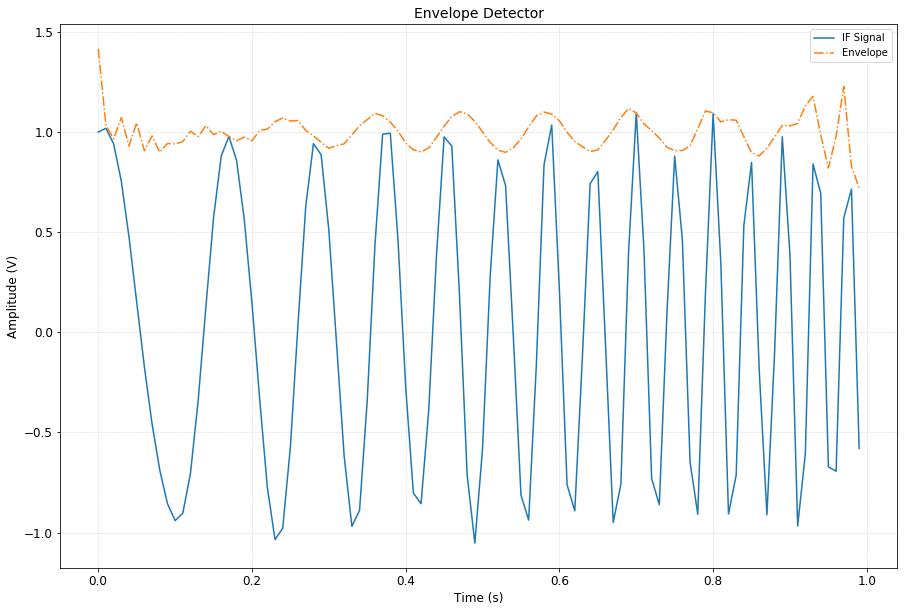

In [8]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Display the envelope and IF signal

plt.plot(time, if_signal, '', label='IF Signal')

plt.plot(time, envelope, '-.', label='Envelope')


# Set the plot title and labels

plt.title('Envelope Detector', size=14)

plt.xlabel('Time (s)', size=12)

plt.ylabel('Amplitude (V)', size=12)


# Set the tick label size

plt.tick_params(labelsize=12)


# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)


# Show the legend

plt.legend(loc='upper right', prop={'size': 10})